In [8]:
import healpy
import numpy
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot

In [6]:
def ReadCell(cl_s_name, isScalar = True):
    cl_s = numpy.loadtxt(cl_s_name)
    if len(cl_s[0]) in (4, 6) and isScalar:
        cl_s = numpy.c_[cl_s[:,:3], numpy.zeros(len(cl_s))[:,numpy.newaxis],cl_s[:,3]]
    cls, ls = cl_s.T[1:5], cl_s.T[0]
    cl = cls * 2.* numpy.pi/(ls*(ls+1.))
    cl = numpy.c_[ numpy.zeros([cl.shape[0],2]),cl]
    lmax = min(len(cl[1]),len(cl[2]))
    cl[0][:lmax] = cl[0][:lmax]  #TT
    cl[1][:lmax] = cl[1][:lmax]  #EE
    cl[2][:lmax] = cl[2][:lmax]  #BB
    cl[3][:lmax] = cl[3][:lmax]  #TE
    return cl

# Read power spectra
Data are created by CAMB based on the result of the Planck 2018 results.
The power spectra are converted into maps assuming Gaussian fluctuation

In [10]:
cls = ReadCell('./data/camb_lensedcls_Planck2018.dat')
maps = healpy.synfast(cls, nside = 4)

/home/yminami/.pyenv/versions/anaconda3-5.3.1/envs/py37/lib/python3.6/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


# Plot the maps

0th component in maps is Stokes *I* map, 1st and 2nd are Stokes *Q* and *U*, respectively.

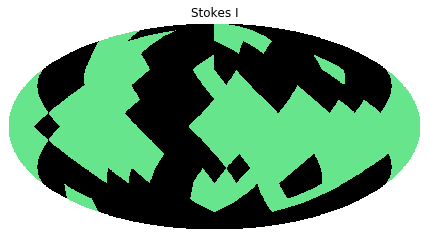

In [14]:
#For the binary color map 
fig = pyplot.figure(num=0)
colors = [(0, 0, 0), (0.4, 0.9, 0.55)] # first color is black, last is green
cmap = LinearSegmentedColormap.from_list(
        "Custom", colors, N=2)
map_pix = healpy.mollview(maps[0], return_projected_map= True, fig=0, margins=None, cmap=cmap, cbar=False, title= 'Stokes I')
#fig.savefig('./outfigure/[HogeHoge]_Binary.png')

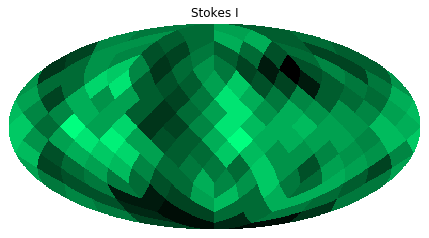

In [16]:
#For the gradient color map 
fig = pyplot.figure(num=0)
colors = [(0, 0, 0), (0.0, 1., 0.5)] # first color is black, last is green
cmap = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)
map_pix = healpy.mollview(maps[0], return_projected_map= True, fig=0, margins=None, cmap=cmap, cbar=False, title= 'Stokes I')
#fig.savefig('./outfigure/[HogeHoge]_Gradient.png')